In [ ]:
%matplotlib inline
#import the necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MPC dataset/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv')
df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
4,1444079431,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2


In [ ]:
df.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
count,2.287000e+03,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,...,0.0,0.0,2119.000000,0.0,0.0,0.0,1594.0,2119.000000,0.0,2287.000000
mean,1.444253e+09,0.999602,0.024709,0.019451,0.040479,0.984296,0.996875,1.012116,2.260606,6.681515,...,NaN,NaN,0.091081,NaN,NaN,NaN,1.0,0.156206,NaN,1.800612
std,1.590692e+05,0.015801,0.084795,0.087645,0.131457,0.050099,0.013747,0.064761,0.522906,0.017499,...,NaN,NaN,0.287792,NaN,NaN,NaN,0.0,0.363136,NaN,0.962344
min,1.444079e+09,0.976320,0.000955,-0.278241,0.001236,0.472272,0.762243,0.980864,0.150662,6.334467,...,NaN,NaN,0.000000,NaN,NaN,NaN,1.0,0.000000,NaN,-1.000000
25%,1.444116e+09,0.995094,0.001175,-0.000534,0.001547,0.993113,0.994704,0.996158,2.066401,6.684608,...,NaN,NaN,0.000000,NaN,NaN,NaN,1.0,0.000000,NaN,2.000000
50%,1.444175e+09,0.996954,0.001282,0.000264,0.001692,0.995538,0.996780,0.997955,2.506754,6.684611,...,NaN,NaN,0.000000,NaN,NaN,NaN,1.0,0.000000,NaN,2.000000
75%,1.444380e+09,1.000210,0.002906,0.000700,0.005376,0.996693,0.999723,1.001175,2.584732,6.684611,...,NaN,NaN,0.000000,NaN,NaN,NaN,1.0,0.000000,NaN,2.000000
max,1.444751e+09,1.274234,1.180354,1.430619,1.840096,1.007394,1.132724,1.931401,2.862048,6.684611,...,NaN,NaN,1.000000,NaN,NaN,NaN,1.0,1.000000,NaN,6.000000


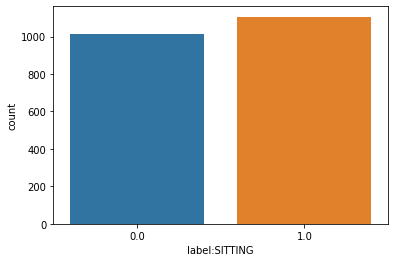

In [ ]:
import seaborn as sns
sns.countplot(x ='label:SITTING', data = df)

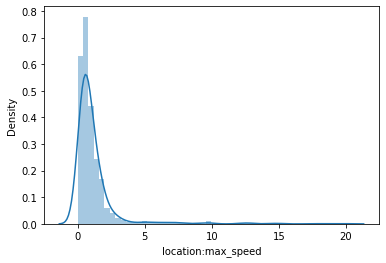

In [ ]:
data = df['location:max_speed']
sns.distplot(data)
plt.show()

In [ ]:
def get_sensor_names_from_features(feature_names):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc';
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro';
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet';
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc';
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass';
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud';
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP';
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS';
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);
        pass;
    return feat_sensor_names; 

def standardize_features(X,mean_vec,std_vec):
    X_centralized = X - mean_vec.reshape((1,-1));
    if 1:
      pass
    normalizers = np.where(std_vec > 0., std_vec, 1.).reshape((1,-1));
    X_standard = X_centralized / normalizers;
    return X_standard; 

def estimate_standardization_params(X):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        mean_vec = np.nanmean(X,axis=0);
        if 1:
          pass
        std_vec = np.nanstd(X,axis=0);
        return (mean_vec,std_vec);
    
def get_label_names(users_df):
    for (ci,col) in enumerate(users_df.columns):
        if col.startswith('label:'):
            first_label_ind = ci;
            break;
        pass;
    label_names = np.array(users_df.columns[first_label_ind:-1]);
    for (li,label) in enumerate(label_names):
        assert label.startswith('label:');
        pass;
    return (list(label_names));

def get_features_from_data(users_df):
    for (ci,col) in enumerate(users_df.columns):
        if col.startswith('label:'):
            first_label_ind = ci;
            break;
    pass;
    feature_names = users_df.columns[1:first_label_ind];
    return np.array(feature_names)

def prepare_X_Y_for_ML(users_df):
    feature_names = get_features_from_data(users_df)
    feat_sensor_names = get_sensor_names_from_features(feature_names);
    X = users_df[feature_names]
    if 1:
      pass
    (mean_vec,std_vec) = estimate_standardization_params(X);
    X = standardize_features(X,mean_vec,std_vec);
    X[np.isnan(X)] = 0.
    label_names = get_label_names(users_df)
    Y = users_df[label_names]
    trinary_labels_mat = users_df[label_names]; 
    M = np.isnan(trinary_labels_mat); 
    Y = np.where(M,0,trinary_labels_mat) > 0.; 
    y_df = pd.DataFrame(Y)
    y_df.rename(columns=dict(enumerate(label_names, 0)), inplace = True)
    return (X,y_df,M,feature_names,label_names)

(X,Y,M,feature_names,label_names) = prepare_X_Y_for_ML(df)
XY = pd.concat([X, Y], axis=1, sort=False)
XY.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,-0.176420,-0.249834,-0.253772,-0.258564,0.217749,-0.003670,-0.210261,-0.979071,0.176597,0.205436,...,False,False,False,False,False,False,False,True,True,False
1,-0.173318,-0.242249,-0.257470,-0.254349,0.212837,0.007680,-0.206184,-0.621726,0.176483,0.173897,...,False,False,False,False,False,False,False,True,True,False
2,-0.175787,-0.248206,-0.186669,-0.261760,0.209643,-0.019022,-0.207141,-0.437700,0.176597,0.186031,...,False,False,False,False,False,False,False,True,True,False
3,-0.172685,-0.249692,-0.214834,-0.261889,0.214694,0.002296,-0.207357,-0.756110,0.176597,0.168457,...,False,False,False,False,False,False,False,True,True,False
4,-0.141223,0.152685,0.273183,0.470627,0.224636,-0.001124,-0.214848,-3.442674,0.136529,0.143143,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
print("Number of columns =", df.columns.size)
for column in df.columns:
    print (column)

Number of columns = 278
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_s

In [ ]:
print ("Number of features columns in the dataset =",feature_names.size)

Number of features columns in the dataset = 225


In [ ]:
corr = Y[label_names].corr().sort_values(by=label_names, ascending=False)
corr.dropna(how='all')

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.614386,-0.175876,NaN,NaN,0.808595,NaN,-0.203984,-0.249521,-0.194917,...,NaN,NaN,NaN,-0.192743,NaN,NaN,NaN,-0.004033,-0.261167,NaN
label:SLEEPING,0.808595,-0.496790,-0.142212,NaN,NaN,1.000000,NaN,-0.164940,-0.201762,-0.157609,...,NaN,NaN,NaN,-0.155851,NaN,NaN,NaN,0.282283,-0.211178,NaN
label:OR_indoors,0.471541,-0.096888,-0.310011,NaN,NaN,0.453720,NaN,0.283972,-0.444683,-0.347370,...,NaN,NaN,NaN,-0.007471,NaN,NaN,NaN,0.354869,-0.465438,NaN
label:LOC_home,0.349212,-0.227999,-0.239679,NaN,NaN,0.268038,NaN,-0.281960,-0.344904,-0.269426,...,NaN,NaN,NaN,0.054041,NaN,NaN,NaN,0.058538,-0.361002,NaN
label:WATCHING_TV,0.046600,-0.028630,-0.008196,NaN,NaN,-0.015188,NaN,-0.009506,-0.011628,-0.009083,...,NaN,NaN,NaN,-0.008982,NaN,NaN,NaN,-0.044869,-0.012170,NaN
label:PHONE_ON_TABLE,-0.004033,0.514324,-0.420140,NaN,NaN,0.282283,NaN,0.208584,0.259144,0.141393,...,NaN,NaN,NaN,-0.128418,NaN,NaN,NaN,1.000000,0.200927,NaN
label:BATHING_-_SHOWER,-0.051586,-0.078631,-0.022509,NaN,NaN,-0.041712,NaN,-0.026107,-0.031934,-0.024946,...,NaN,NaN,NaN,0.267640,NaN,NaN,NaN,0.053575,-0.033425,NaN
label:DRESSING,-0.054941,-0.083746,-0.023973,NaN,NaN,-0.044425,NaN,-0.027805,-0.034012,-0.026569,...,NaN,NaN,NaN,0.285050,NaN,NaN,NaN,-0.131247,-0.035599,NaN
label:SHOPPING,-0.058109,-0.088574,0.330399,NaN,NaN,-0.046987,NaN,-0.029408,-0.035973,-0.028101,...,NaN,NaN,NaN,-0.027787,NaN,NaN,NaN,-0.138814,-0.037652,NaN
label:CLEANING,-0.082525,-0.125791,-0.036009,NaN,NaN,-0.066729,NaN,-0.041764,-0.051088,-0.039908,...,NaN,NaN,NaN,0.428161,NaN,NaN,NaN,0.085708,-0.053472,NaN


In [ ]:
n_examples_per_label = np.sum(np.array(Y),axis=0)
labels_and_counts = zip(label_names,n_examples_per_label)
sorted_labels_and_counts = sorted(labels_and_counts,reverse=True,key=lambda pair:pair[1])
print ("number of examples for every context label:")
print ("-"*20)
i = 0
label_x_arr = []
if 1:
  pass
label_y_arr = []
for (label,count) in sorted_labels_and_counts:
    i = i +1
    label_x_arr.append(label)
    label_y_arr.append(count)
    print (" %i : %s - %d minutes"  % (i,label,count))
    pass;

number of examples for every context label:
--------------------
 1 : label:PHONE_ON_TABLE - 1594 minutes
 2 : label:OR_indoors - 1284 minutes
 3 : label:SITTING - 1106 minutes
 4 : label:LOC_home - 995 minutes
 5 : label:LYING_DOWN - 657 minutes
 6 : label:SLEEPING - 477 minutes
 7 : label:WITH_CO-WORKERS - 331 minutes
 8 : label:IN_A_MEETING - 306 minutes
 9 : label:IN_CLASS - 214 minutes
 10 : label:LOC_main_workplace - 197 minutes
 11 : label:OR_standing - 193 minutes
 12 : label:FIX_walking - 163 minutes
 13 : label:COMPUTER_WORK - 89 minutes
 14 : label:COOKING - 55 minutes
 15 : label:EATING - 54 minutes
 16 : label:ON_A_BUS - 49 minutes
 17 : label:CLEANING - 38 minutes
 18 : label:SHOPPING - 19 minutes
 19 : label:DRESSING - 17 minutes
 20 : label:BATHING_-_SHOWER - 15 minutes
 21 : label:WATCHING_TV - 2 minutes
 22 : label:FIX_running - 0 minutes
 23 : label:BICYCLING - 0 minutes
 24 : label:LAB_WORK - 0 minutes
 25 : label:OR_outside - 0 minutes
 26 : label:IN_A_CAR - 0 minu

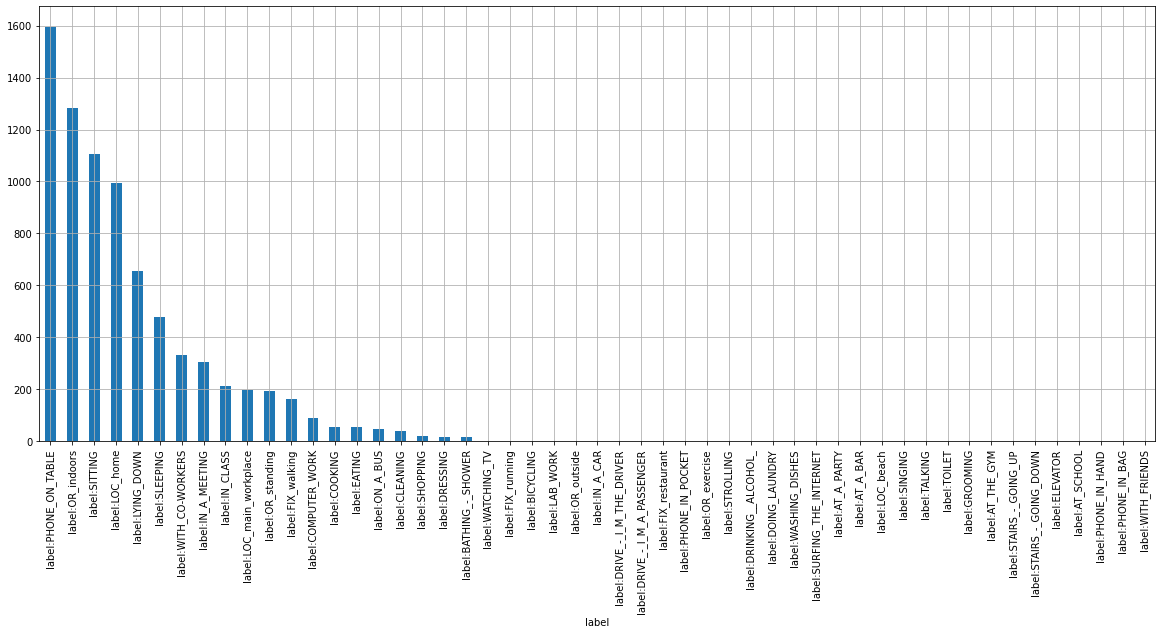

In [ ]:
labels_df = pd.DataFrame(sorted_labels_and_counts)
labels_df.rename(columns = {0:'label'}, inplace = True) 
labels_df.rename(columns = {1:'count'}, inplace = True) 
labels_df.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(20, 8))

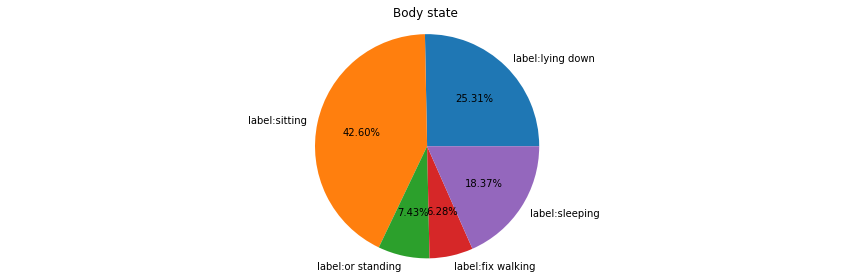

In [ ]:
def get_label_name(label):
    if label == 'FIX_walking':
        return 'Walking';
    if label == 'FIX_running':
        return 'Running';
    if label == 'LOC_main_workplace':
        return 'At main workplace';
    if label == 'OR_indoors':
        return 'Indoors';
    if label == 'OR_outside':
        return 'Outside';
    if label == 'LOC_home':
        return 'At home';
    if label == 'FIX_restaurant':
        return 'At a restaurant';
    if label == 'OR_exercise':
        return 'Exercise';
    if label == 'LOC_beach':
        return 'At the beach';
    if label == 'OR_standing':
        return 'Standing';
    if label == 'WATCHING_TV':
        return 'Watching TV'
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    return label;

def figure_pie_chart(Y,label_names,labels_to_display,title_str,ax):
    portion_of_time = np.mean(Y, axis = 0)
    portions_to_display = [portion_of_time[label_names.index(label)] for label in labels_to_display]
    if 1:
      pass
    pretty_labels_to_display = [get_label_name(label) for label in labels_to_display]
    ax.pie(portions_to_display, labels = pretty_labels_to_display, autopct = '%.2f%%', radius = 900)
    ax.axis('equal')
    plt.title(title_str)
    return

fig = plt.figure(figsize = (15, 10), facecolor='white')
ax1 = plt.subplot(2, 1, 1)
labels_to_display = ['label:LYING_DOWN','label:SITTING','label:OR_standing','label:FIX_walking','label:SLEEPING']
figure_pie_chart(Y,label_names,labels_to_display,'Body state',ax1)


In [ ]:
def jaccard_similarity_for_label_pairs(Y):
    (n_examples,n_labels) = Y.shape;
    Y = Y.astype(int);
    both_labels_counts = np.dot(Y.T,Y);
    neither_label_counts = np.dot((1-Y).T,(1-Y));
    either_label_counts = n_examples - neither_label_counts;
    J = np.where(either_label_counts > 0, both_labels_counts.astype(float) / either_label_counts, 0.);
    return J;

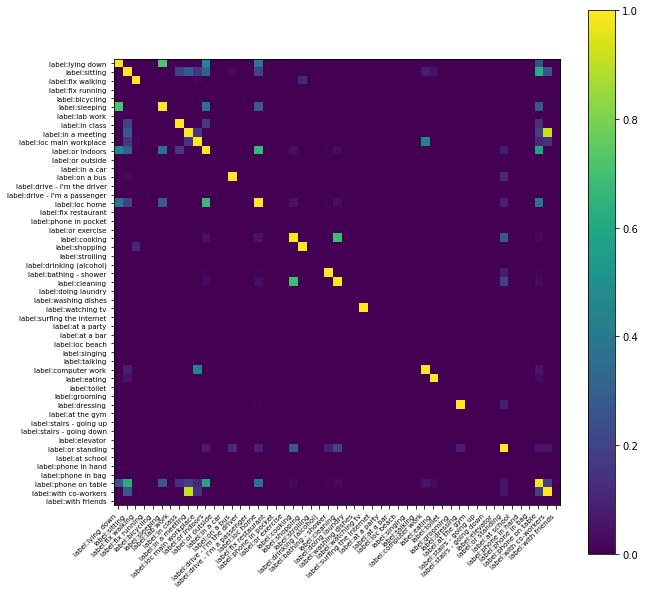

In [ ]:
J = jaccard_similarity_for_label_pairs(Y);
fig = plt.figure(figsize=(10,10),facecolor='white');
ax = plt.subplot(1,1,1);
plt.imshow(J,interpolation='none');plt.colorbar();

pretty_label_names = [get_label_name(label) for label in label_names];
n_labels = len(label_names);
ax.set_xticks(range(n_labels));
ax.set_xticklabels(pretty_label_names,rotation=45,ha='right',fontsize=7);
ax.set_yticks(range(n_labels));
ax.set_yticklabels(pretty_label_names,fontsize=7);

In [ ]:
feat_sensor_names = get_sensor_names_from_features(feature_names)
print(pd.unique(feat_sensor_names))

['Acc' 'Gyro' 'Magnet' 'WAcc' 'Compass' 'Loc' 'Aud' 'AP' 'PS' 'LF']


In [ ]:
def project_features_to_selected_sensors(feature_names,sensors_to_use):
    feature_names_arr = []
    for sensor in sensors_to_use:
        if sensor == 'Acc':
            for feature in feature_names:
                if (feature.startswith('raw_acc')):
                    feature_names_arr.append(feature)
        elif sensor == 'WAcc':
            for feature in feature_names:
                if (feature.startswith('watch_acceleration')):
                    feature_names_arr.append(feature)
        elif sensor == 'Gyro':
            for feature in feature_names:
                if (feature.startswith('proc_gyro')):
                    feature_names_arr.append(feature)
        elif sensor == 'Magnet':
            for feature in feature_names:
                if (feature.startswith('raw_magnet')):
                    feature_names_arr.append(feature)
        elif sensor == 'Compass':
            for feature in feature_names:
                if (feature.startswith('watch_heading')):
                    feature_names_arr.append(feature)
        elif sensor == 'Loc':
            for feature in feature_names:
                if (feature.startswith('location')):
                    feature_names_arr.append(feature)
        elif sensor == 'Aud':
            for feature in feature_names:
                if (feature.startswith('audio_naive')):
                    feature_names_arr.append(feature)
        elif sensor == 'AP':
            for feature in feature_names:
                if (feature.startswith('audio_properties')):
                    feature_names_arr.append(feature)
        elif sensor == 'PS':
            for feature in feature_names:
                if (feature.startswith('discrete')):
                    feature_names_arr.append(feature)
        elif sensor == 'LF':
            for feature in feature_names:
                if (feature.startswith('lf_measurements')):
                    feature_names_arr.append(feature)           
    return feature_names_arr

### Features selected: Phone accelerometer and Watch accelerometer

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [ ]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[630  11]
 [ 25  21]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       641
        True       0.66      0.46      0.54        46

    accuracy                           0.95       687
   macro avg       0.81      0.72      0.76       687
weighted avg       0.94      0.95      0.94       687



In [ ]:
Perfomance=pd.DataFrame(columns=['Features selected','Classifier','Accuracy'])
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Phone accelerometer, Watch accelerometer","Classifier":"Logistic reg",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)
df_feat.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,watch_acceleration:spectrum:z_log_energy_band0,watch_acceleration:spectrum:z_log_energy_band1,watch_acceleration:spectrum:z_log_energy_band2,watch_acceleration:spectrum:z_log_energy_band3,watch_acceleration:spectrum:z_log_energy_band4,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range0,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range1,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range2,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range3,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range4
0,-0.176420,-0.249834,-0.253772,-0.258564,0.217749,-0.003670,-0.210261,-0.979071,0.176597,0.205436,...,-1.065539,-1.342219,-1.421101,-1.296285,-1.419613,1.062481,1.069946,1.112950,1.124351,1.163890
1,-0.173318,-0.242249,-0.257470,-0.254349,0.212837,0.007680,-0.206184,-0.621726,0.176483,0.173897,...,-1.088626,-1.344645,-1.417632,-1.294432,-1.320885,1.060941,1.069547,1.112524,1.124199,1.163976
2,-0.175787,-0.248206,-0.186669,-0.261760,0.209643,-0.019022,-0.207141,-0.437700,0.176597,0.186031,...,-1.058504,-1.338008,-1.426608,-1.285480,-1.426570,1.058960,1.068049,1.111918,1.123830,1.163938
3,-0.172685,-0.249692,-0.214834,-0.261889,0.214694,0.002296,-0.207357,-0.756110,0.176597,0.168457,...,-1.085960,-1.343624,-1.401705,-1.263907,-1.405786,1.063032,1.070446,1.113085,1.124466,1.163986
4,-0.141223,0.152685,0.273183,0.470627,0.224636,-0.001124,-0.214848,-3.442674,0.136529,0.143143,...,-1.442485,2.234430,1.260579,1.883254,4.265814,-0.386577,-0.796223,0.113917,0.423861,1.119432


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY['label:FIX_walking'],test_size=0.30, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[624  17]
 [ 13  33]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       641
        True       0.66      0.72      0.69        46

    accuracy                           0.96       687
   macro avg       0.82      0.85      0.83       687
weighted avg       0.96      0.96      0.96       687



In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

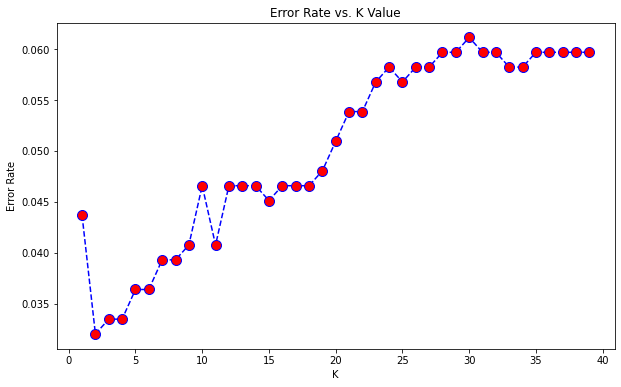

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('For K=15')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

For K=15
[[633   8]
 [ 23  23]]


              precision    recall  f1-score   support

       False       0.96      0.99      0.98       641
        True       0.74      0.50      0.60        46

    accuracy                           0.95       687
   macro avg       0.85      0.74      0.79       687
weighted avg       0.95      0.95      0.95       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Phone accelerometer, Watch accelerometer","Classifier":"KNN",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY['label:FIX_walking'],test_size=0.30, random_state=42)

In [ ]:
import sklearn.ensemble as ensemble
rf_clf = ensemble.RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[633   8]
 [ 19  27]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       641
        True       0.77      0.59      0.67        46

    accuracy                           0.96       687
   macro avg       0.87      0.79      0.82       687
weighted avg       0.96      0.96      0.96       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Phone accelerometer, Watch accelerometer","Classifier":"Random Forest",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699


### Features selected: Phone accelerometer, Watch accelerometer, Gyroscope, location sensor

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc','Gyro','Loc'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [ ]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[628  13]
 [ 24  22]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       641
        True       0.63      0.48      0.54        46

    accuracy                           0.95       687
   macro avg       0.80      0.73      0.76       687
weighted avg       0.94      0.95      0.94       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Phone acc, Watch acc, Gyroscope, location sensor","Classifier":"Logistic regression",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699
3,"Phone acc, Watch acc, Gyroscope, location sensor",Logistic regression,0.946143


In [ ]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY['label:FIX_walking'],test_size=0.30, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[631  10]
 [ 13  33]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       641
        True       0.77      0.72      0.74        46

    accuracy                           0.97       687
   macro avg       0.87      0.85      0.86       687
weighted avg       0.97      0.97      0.97       687



In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

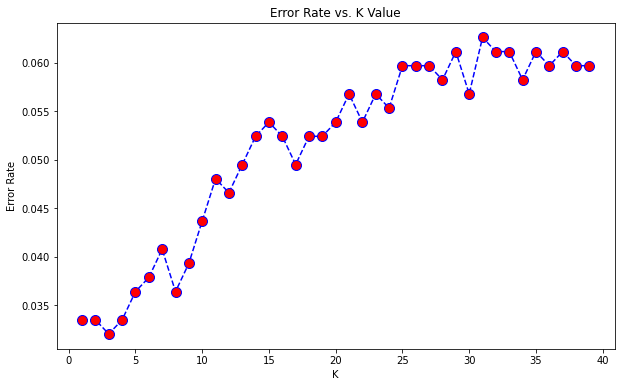

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('For K=15')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

For K=15
[[629  12]
 [ 25  21]]


              precision    recall  f1-score   support

       False       0.96      0.98      0.97       641
        True       0.64      0.46      0.53        46

    accuracy                           0.95       687
   macro avg       0.80      0.72      0.75       687
weighted avg       0.94      0.95      0.94       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Phone acc, Watch acc, Gyroscope, location sensor","Classifier":"KNN",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699
3,"Phone acc, Watch acc, Gyroscope, location sensor",Logistic regression,0.946143
4,"Phone acc, Watch acc, Gyroscope, location sensor",KNN,0.946143


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY['label:FIX_walking'],test_size=0.30, random_state=42)

In [ ]:
import sklearn.ensemble as ensemble
rf_clf = ensemble.RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[633   8]
 [ 20  26]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       641
        True       0.76      0.57      0.65        46

    accuracy                           0.96       687
   macro avg       0.87      0.78      0.81       687
weighted avg       0.96      0.96      0.96       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Phone acc, Watch acc, Gyroscope, location sensor","Classifier":"Random forest",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699
3,"Phone acc, Watch acc, Gyroscope, location sensor",Logistic regression,0.946143
4,"Phone acc, Watch acc, Gyroscope, location sensor",KNN,0.946143
5,"Phone acc, Watch acc, Gyroscope, location sensor",Random forest,0.959243


### Features selected: Location and Audio features 

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Loc','Aud'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[621  20]
 [ 29  17]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       641
        True       0.46      0.37      0.41        46

    accuracy                           0.93       687
   macro avg       0.71      0.67      0.69       687
weighted avg       0.92      0.93      0.93       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Location and Audio features ","Classifier":"Logistic regression",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699
3,"Phone acc, Watch acc, Gyroscope, location sensor",Logistic regression,0.946143
4,"Phone acc, Watch acc, Gyroscope, location sensor",KNN,0.946143
5,"Phone acc, Watch acc, Gyroscope, location sensor",Random forest,0.959243
6,Location and Audio features,Logistic regression,0.928675


In [ ]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY['label:FIX_walking'],test_size=0.30, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[624  17]
 [ 16  30]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       641
        True       0.64      0.65      0.65        46

    accuracy                           0.95       687
   macro avg       0.81      0.81      0.81       687
weighted avg       0.95      0.95      0.95       687



In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

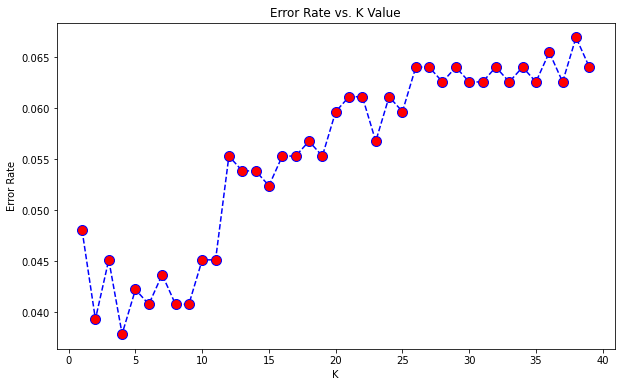

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('For K=15')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

For K=15
[[638   3]
 [ 33  13]]


              precision    recall  f1-score   support

       False       0.95      1.00      0.97       641
        True       0.81      0.28      0.42        46

    accuracy                           0.95       687
   macro avg       0.88      0.64      0.70       687
weighted avg       0.94      0.95      0.94       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Location and Audio features ","Classifier":"KNN",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699
3,"Phone acc, Watch acc, Gyroscope, location sensor",Logistic regression,0.946143
4,"Phone acc, Watch acc, Gyroscope, location sensor",KNN,0.946143
5,"Phone acc, Watch acc, Gyroscope, location sensor",Random forest,0.959243
6,Location and Audio features,Logistic regression,0.928675
7,Location and Audio features,KNN,0.947598


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY['label:FIX_walking'],test_size=0.30, random_state=42)

In [ ]:
import sklearn.ensemble as ensemble
rf_clf = ensemble.RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[640   1]
 [ 31  15]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       641
        True       0.94      0.33      0.48        46

    accuracy                           0.95       687
   macro avg       0.95      0.66      0.73       687
weighted avg       0.95      0.95      0.94       687



In [ ]:
m=accuracy_score(y_test,pred)
Perfomance=Perfomance.append({"Features selected":"Location and Audio features ","Classifier":"Random forest",'Accuracy':m},ignore_index=True)
Perfomance

,Features selected,Classifier,Accuracy
0,"Phone accelerometer, Watch accelerometer",Logistic reg,0.947598
1,"Phone accelerometer, Watch accelerometer",KNN,0.954876
2,"Phone accelerometer, Watch accelerometer",Random Forest,0.960699
3,"Phone acc, Watch acc, Gyroscope, location sensor",Logistic regression,0.946143
4,"Phone acc, Watch acc, Gyroscope, location sensor",KNN,0.946143
5,"Phone acc, Watch acc, Gyroscope, location sensor",Random forest,0.959243
6,Location and Audio features,Logistic regression,0.928675
7,Location and Audio features,KNN,0.947598
8,Location and Audio features,Random forest,0.953421


### Kmeans clustering

#### All features selected 

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc','Gyro','Magnet','WAcc','Compass','Loc','Aud','AP','PS','LF'])

In [ ]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)

In [ ]:
from sklearn.cluster import KMeans

For n_clusters = 2 Average Silhouette Score: 0.47212374216846587


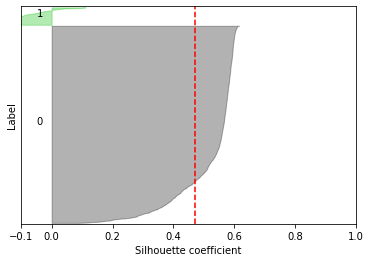

For n_clusters = 3 Average Silhouette Score: 0.11580615155889075


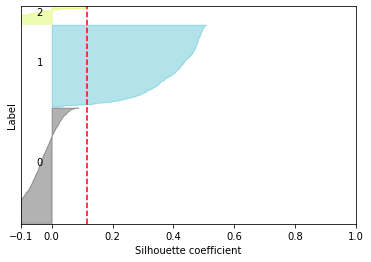

For n_clusters = 4 Average Silhouette Score: 0.10912650355805728


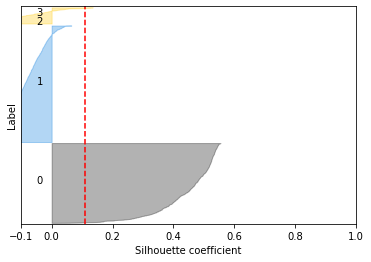

For n_clusters = 5 Average Silhouette Score: 0.21670692840083158


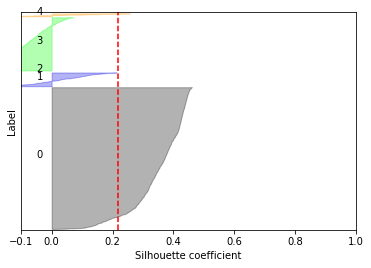

For n_clusters = 6 Average Silhouette Score: 0.14452501745898194


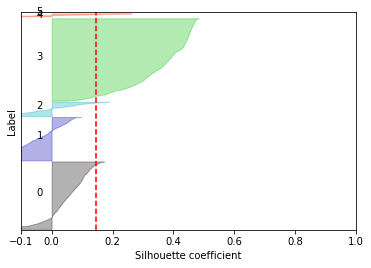

For n_clusters = 7 Average Silhouette Score: 0.15516976692414516


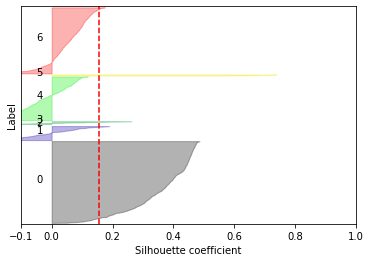

For n_clusters = 8 Average Silhouette Score: 0.16526872856800218


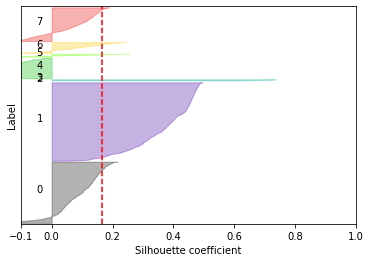

For n_clusters = 9 Average Silhouette Score: 0.16662212546304012


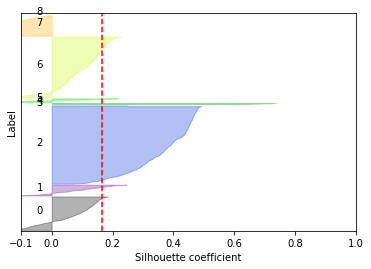

For n_clusters = 10 Average Silhouette Score: 0.16764998261419958


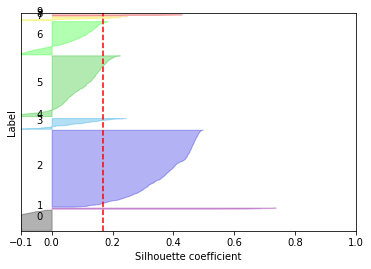

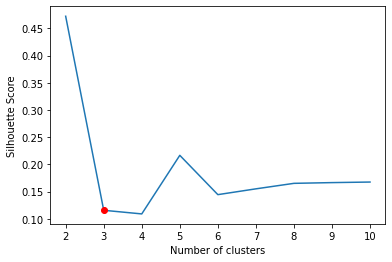

In [ ]:
# Silhouette Score Method
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
r = range(2,11)
ds = dict()

for i in r:
    kmean = KMeans(n_clusters = i,random_state=0)
    result = kmean.fit_predict(scaled_features)
    a = silhouette_score(scaled_features,result)
    print("For n_clusters =", i,"Average Silhouette Score:", a) 
    ds[i] = a
    s = silhouette_samples(scaled_features,result)  #computation
    y1 = 10
    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])   #range
    ax.set_ylim([0, scaled_features.shape[0] + (i + 1) * 10])
    
    for j in range(i):
        sil_val = s[result== j]
        sil_val.sort()
        cluster_size = sil_val.shape[0]
        y2 = y1 + cluster_size
        c = cm.nipy_spectral(float(j) / i)
        ax.fill_betweenx(np.arange(y1, y2),0, sil_val, facecolor=c, edgecolor=c, alpha=0.3)
        ax.text(-0.05, y1 + 0.5 * cluster_size, str(j))
        y1 = y2 + 10 
        
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Label")
    ax.axvline(x=a, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    
d1 = pd.Series(ds)
ax = d1.plot()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,d1[3],'ro')

In [ ]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit_predict(scaled_features)
inertia = KM.inertia_
labels = KM.labels_
centroids= KM.cluster_centers_
print("The Labels are:",labels)
print("Centroids:",centroids)
print("The Shape of the centroid is: ",centroids.shape)
print("Inertia:",inertia)

The Labels are: [0 0 0 ... 0 0 0]
Centroids: [[-1.29762981e-01 -2.09213612e-01 -1.75773540e-01 -1.89359409e-01
   2.21441650e-01  3.98204908e-02 -1.95579457e-01 -2.96488443e-01
   1.68784114e-01  1.66163974e-01 -1.87345595e-01 -2.45279247e-01
  -2.35156270e-01 -2.09647611e-01 -1.93869826e-01 -1.07520310e-01
  -2.07365063e-01  3.94012324e-02 -9.60251053e-03  2.09267650e-01
  -1.87980680e-01 -1.58147440e-01 -1.70294379e-01  8.79995353e-03
   5.24258941e-02 -4.58037663e-02 -2.14607400e-01 -1.52920581e-01
  -1.12903477e-01 -1.18083988e-01 -2.14769369e-01 -2.17485721e-01
  -2.19359675e-01 -2.53021608e-01 -8.45739772e-02  5.69803293e-02
  -2.48693214e-02 -8.02345205e-02 -5.84549552e-02 -9.01388991e-03
  -5.68050027e-03 -6.69753166e-02 -2.10980452e-02 -2.32287253e-02
  -4.86399235e-03  5.65455726e-03 -1.92992195e-01 -1.76912693e-01
  -1.80918842e-01  2.54115306e-01 -2.04896093e-01  1.79992451e-01
  -1.15274929e-01 -4.41085702e-02 -4.60819578e-03 -5.04525391e-02
  -1.11206573e-01 -1.14608607e-

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix as sm
from sklearn.decomposition import PCA

In [ ]:
#GMM
GMM = GaussianMixture(n_components = 3, random_state=0)
result = GMM.fit(scaled_features)
mean = GMM.means_
wt = GMM.weights_
labels2 = GMM.predict(scaled_features)
print("The Labels are:",labels)
print("Weights:",wt)
print("Means:",mean)

The Labels are: [0 0 0 ... 0 0 0]
Weights: [0.50983822 0.10100568 0.3891561 ]
Means: [[-2.21703177e-01 -2.71281228e-01 -2.21255170e-01 -2.87844947e-01
   2.15983390e-01 -5.66074622e-02 -2.32308098e-01  3.52632250e-01
   1.76666799e-01  1.77976657e-01 -2.30437348e-01 -2.76506187e-01
  -2.82421794e-01 -2.83583883e-01 -2.09037812e-01  2.22637670e-01
  -2.51024395e-01 -6.34409393e-02  1.97935942e-01 -4.88568575e-01
  -3.31104609e-01 -2.94644303e-01 -3.38653202e-01  4.11927007e-02
   3.22909821e-02  1.05278761e-01 -3.17333875e-01 -3.39898061e-01
  -3.26570774e-01 -3.30512434e-01 -2.56904327e-01 -2.71240612e-01
  -3.00137494e-01  3.00125121e-01  2.30903579e-01 -3.20544811e-01
  -2.63526536e-01 -2.04052398e-01  6.29248326e-03  4.24953286e-01
  -4.54706119e-02 -2.55801043e-02 -2.34532211e-01 -1.66415406e-02
   4.70241597e-03  1.49863686e-03 -3.30467307e-01 -3.22612351e-01
  -3.22668438e-01 -4.37490974e-01  2.00482252e-01 -2.91565062e-01
  -2.50132066e-02 -5.95449544e-02 -1.64658310e-03 -6.8778

In [ ]:
pca = PCA(random_state=0)
pca.fit(scaled_features)
arr = pca.transform(scaled_features)
pca1 = pd.DataFrame(arr)
var_ratio = pca.explained_variance_ratio_
val = pca.singular_values_
print("Head:",pca1.head())
print("Variance ratio:",var_ratio)
print("Singular Value:",val)

Head:         0         1          2         3         4         5         6    \
0 -2.887439 -5.970417   0.118059 -0.722470  0.341073  4.043409 -2.019674   
1 -2.722175 -5.736745   0.478686 -0.794731 -0.160403  4.634296 -1.124051   
2 -2.744024 -6.336322   1.293314 -0.790869  0.093315  4.434097 -1.669775   
3 -2.823670 -6.482386   0.866799 -0.911418 -0.319249  4.351292 -1.103236   
4  8.768158  8.106059  11.407558  3.258292  9.632147  2.066770 -8.460606   

        7         8         9    ...           215           216  \
0 -5.986129  2.842076  2.567331  ...  1.876861e-19  4.088010e-19   
1 -5.588075  2.323943  1.168038  ...  6.186574e-19  5.563822e-20   
2 -6.258382  1.263462  1.336336  ... -1.915195e-18  1.312205e-18   
3 -5.603009  1.557338  1.533689  ... -3.623021e-18  2.911441e-18   
4 -8.161800 -0.552257  0.410547  ... -5.417977e-18  4.887539e-19   

            217           218           219           220           221  \
0 -2.066338e-18 -4.571824e-19  8.803496e-20  9.367106

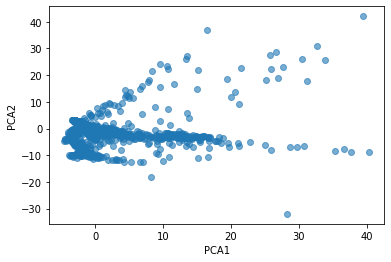

In [ ]:
pca = PCA(n_components=2, random_state=0)
pca.fit(scaled_features)
arr = pca.transform(scaled_features)
pca1 = pd.DataFrame(arr)
plt.scatter(x=pca1.iloc[:,0], y=pca1.iloc[:,1], alpha = 0.6)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
        
def kmeans_plot_pca(kmeans, X, n_clusters, rseed=2, ax=None):
    dot_size = 50
    cmap = 'plasma'
    labels = kmeans.fit_predict(X)
    fig, ax = plt.subplots(figsize=(9,7))    
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() 
             for i, center in enumerate(centers)]
    return          

Text(0, 0.5, 'PCA2')

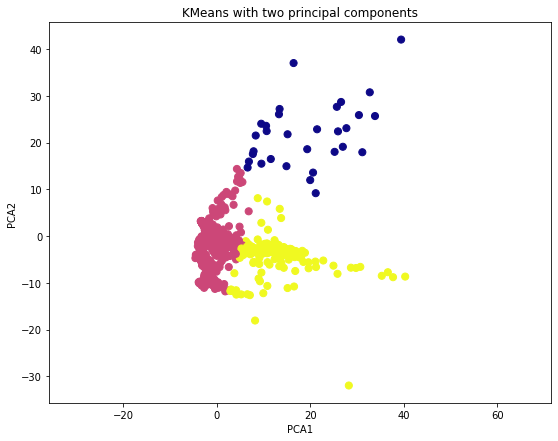

In [ ]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit(pca1)
label1 = KM.predict(pca1)
kmeans_plot_pca(KM, pca1.values,n_clusters=3)
plt.title('KMeans with two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Features selected: Phone Accelerometer, Gyroscope, Location, Audio

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc','Gyro','Loc','Aud'])

In [ ]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)

For n_clusters = 2 Average Silhouette Score: 0.5062615679207177


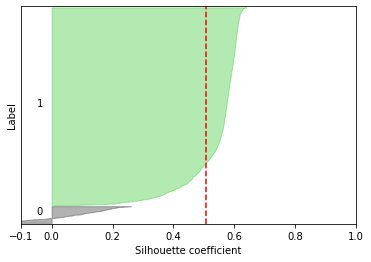

For n_clusters = 3 Average Silhouette Score: 0.18389636625351294


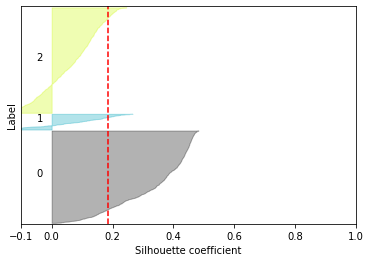

For n_clusters = 4 Average Silhouette Score: 0.1986321657666654


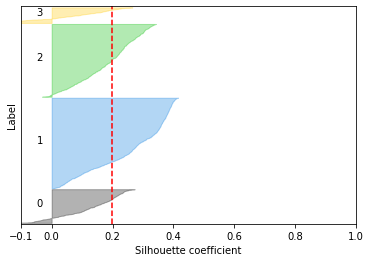

For n_clusters = 5 Average Silhouette Score: 0.2080636133196276


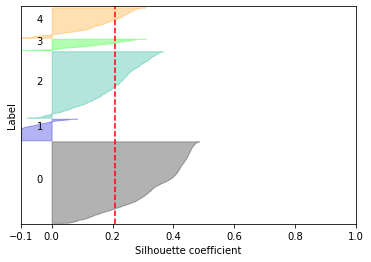

For n_clusters = 6 Average Silhouette Score: 0.21195634910275662


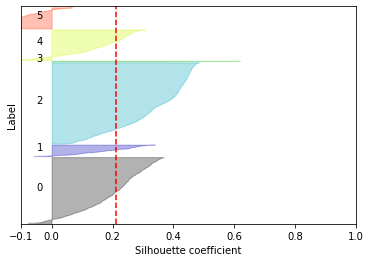

For n_clusters = 7 Average Silhouette Score: 0.1752208847757614


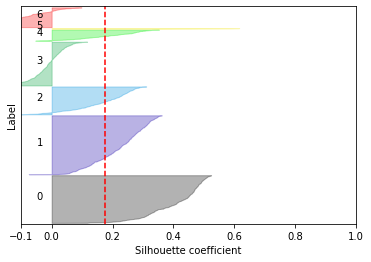

For n_clusters = 8 Average Silhouette Score: 0.2230744159542774


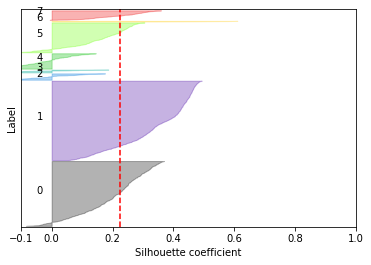

For n_clusters = 9 Average Silhouette Score: 0.17638736054452336


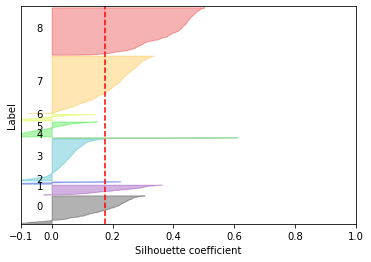

For n_clusters = 10 Average Silhouette Score: 0.16647032008822898


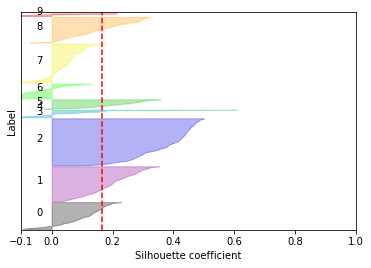

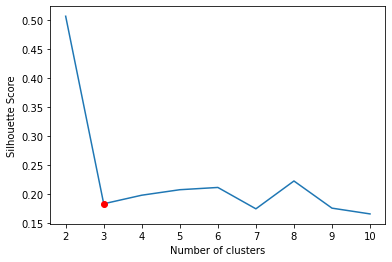

In [ ]:
r = range(2,11)
ds = dict()

for i in r:
    kmean = KMeans(n_clusters = i,random_state=0)
    result = kmean.fit_predict(scaled_features)
    a = silhouette_score(scaled_features,result)
    print("For n_clusters =", i,"Average Silhouette Score:", a) 
    ds[i] = a
    s = silhouette_samples(scaled_features,result)  #computation
    y1 = 10
    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])   #range
    ax.set_ylim([0, scaled_features.shape[0] + (i + 1) * 10])
    
    for j in range(i):
        sil_val = s[result== j]
        sil_val.sort()
        cluster_size = sil_val.shape[0]
        y2 = y1 + cluster_size
        c = cm.nipy_spectral(float(j) / i)
        ax.fill_betweenx(np.arange(y1, y2),0, sil_val, facecolor=c, edgecolor=c, alpha=0.3)
        ax.text(-0.05, y1 + 0.5 * cluster_size, str(j))
        y1 = y2 + 10 
        
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Label")
    ax.axvline(x=a, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    
d1 = pd.Series(ds)
ax = d1.plot()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,d1[3],'ro')

In [ ]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit_predict(scaled_features)
inertia = KM.inertia_
labels = KM.labels_
centroids= KM.cluster_centers_
print("The Labels are:",labels)
print("Centroids:",centroids)
print("The Shape of the centroid is: ",centroids.shape)
print("Inertia:",inertia)

The Labels are: [2 2 2 ... 2 2 2]
Centroids: [[-1.95834530e-01 -2.52963571e-01 -2.13796707e-01 -2.63955855e-01
   2.11211657e-01 -2.81473383e-02 -2.16425840e-01  3.55843476e-01
   1.74663751e-01  1.75324001e-01 -2.21029820e-01 -2.66695934e-01
  -2.66738629e-01 -2.60019067e-01 -2.04882230e-01  2.47652463e-01
  -2.18475810e-01 -7.35814326e-02 -7.19452220e-02 -4.70478074e-01
  -2.80407556e-01 -2.59595660e-01 -3.02055287e-01 -1.68051787e-03
   8.04062259e-04  5.05933599e-03 -2.80008036e-01 -2.90251358e-01
  -2.71982714e-01 -2.76086148e-01 -2.31819505e-01 -2.43428078e-01
  -2.66944449e-01  2.45253360e-01  1.55777464e-01 -2.32443574e-01
  -1.07685266e-01 -5.58028229e-02  2.48266060e-02  3.47839612e-01
   4.81714186e-02  1.14197072e-01 -2.63330169e-01 -2.63311477e-02
   1.31952708e-02 -1.00460842e-02 -2.91478437e-01 -2.75068449e-01
  -2.84424634e-01 -3.71011879e-01  1.98894443e-01 -3.61823329e-01
   4.90488819e-01  2.72618111e-01  2.20596346e-01 -2.90829317e-01
   1.03693216e-01  3.88083736e-

In [ ]:
#GMM
GMM = GaussianMixture(n_components = 3, random_state=0)
result = GMM.fit(scaled_features)
mean = GMM.means_
wt = GMM.weights_
labels2 = GMM.predict(scaled_features)
print("The Labels are:",labels)
print("Weights:",wt)
print("Means:",mean)

The Labels are: [2 2 2 ... 2 2 2]
Weights: [0.46680399 0.1749025  0.35829351]
Means: [[-1.58063017e-01 -2.75295918e-01 -2.21106713e-01 -2.93520414e-01
   2.38265889e-01  1.64124974e-02 -2.18373531e-01  5.13775118e-01
   1.76655244e-01  1.77913826e-01 -2.31109361e-01 -2.76223110e-01
  -2.82378880e-01 -2.85433623e-01 -2.09184916e-01  2.47907637e-01
  -3.17784882e-01 -3.53259542e-01 -1.07856649e-01 -4.58503409e-01
  -3.33351877e-01 -2.97260233e-01 -3.43141946e-01  4.41667570e-02
  -5.57109018e-02  1.15622924e-01 -3.17636309e-01 -3.40338207e-01
  -3.27261205e-01 -3.31195552e-01 -2.57275306e-01 -2.71722014e-01
  -3.00384250e-01  3.20470000e-01  2.48975743e-01 -3.37549940e-01
  -2.36612203e-01 -2.69696839e-01 -1.45962229e-01  4.26143210e-01
  -9.98251688e-02 -1.87027007e-02 -1.84558684e-01 -1.57835882e-02
   5.11327273e-03  2.44842443e-03 -3.31246163e-01 -3.23760375e-01
  -3.21107955e-01 -4.35696223e-01  2.22694130e-01 -2.58945865e-01
   4.91187192e-02 -2.14412884e-02 -6.73978073e-02 -2.5716

In [ ]:
pca = PCA(random_state=0)
pca.fit(scaled_features)
arr = pca.transform(scaled_features)
pca1 = pd.DataFrame(arr)
var_ratio = pca.explained_variance_ratio_
val = pca.singular_values_
print("Head:",pca1.head())
print("Variance ratio:",var_ratio)
print("Singular Value:",val)

Head:          0         1         2         3         4         5         6   \
0 -1.209065  1.619226 -2.238241 -1.469960  0.839815  0.725164  0.428549   
1 -1.177826  1.934225 -2.901385 -0.816430  1.080756  0.586333  0.281559   
2 -1.194178  2.876039 -3.069362 -1.531313  0.113916  1.645015  0.393341   
3 -1.067448  2.624361 -2.949058 -0.848416  0.229931  0.891698  0.127384   
4  1.682506  5.313734  1.316835 -6.925876 -0.830788  2.316966  1.830052   

         7         8         9   ...        85        86        87        88  \
0  0.477100 -0.071371 -0.271478  ...  0.108941  0.024892 -0.059478 -0.041162   
1  0.168503  0.050613 -0.534978  ...  0.055851 -0.031023 -0.052541 -0.012180   
2  0.362010  0.004220 -0.537878  ...  0.061799 -0.001252 -0.061344 -0.043537   
3  0.549204 -0.084632 -0.577954  ...  0.078657 -0.178607 -0.146684 -0.006801   
4  0.910207 -0.816557  0.625853  ... -0.175536 -0.027201 -0.092184 -0.001636   

         89        90        91        92        93        94 

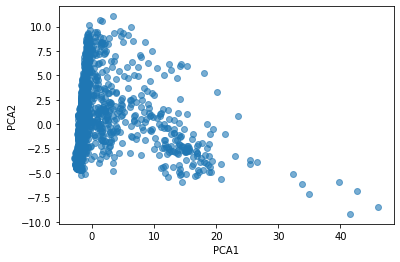

In [ ]:
pca = PCA(n_components=2, random_state=0)
pca.fit(scaled_features)
arr = pca.transform(scaled_features)
pca1 = pd.DataFrame(arr)
plt.scatter(x=pca1.iloc[:,0], y=pca1.iloc[:,1], alpha = 0.6)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
def kmeans_plot_pca(kmeans, X, n_clusters, rseed=2, ax=None):
    dot_size = 50
    cmap = 'plasma'
    labels = kmeans.fit_predict(X)
    fig, ax = plt.subplots(figsize=(9,7))    
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() 
             for i, center in enumerate(centers)]
    return          

Text(0, 0.5, 'PCA2')

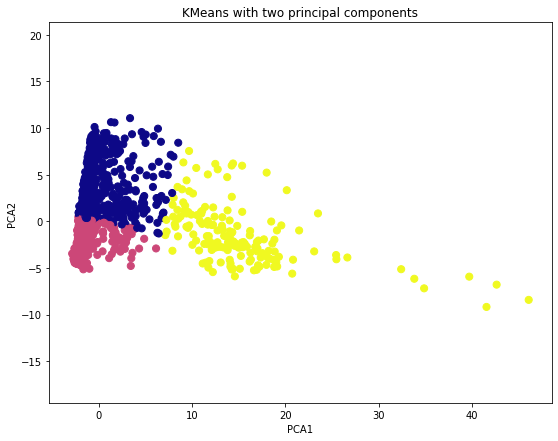

In [ ]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit(pca1)
label1 = KM.predict(pca1)
kmeans_plot_pca(KM, pca1.values,n_clusters=3)
plt.title('KMeans with two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Features selected: Accelerometers and Gyroscope

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc','Gyro','WAcc'])

In [ ]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)

For n_clusters = 2 Average Silhouette Score: 0.6273812396322452


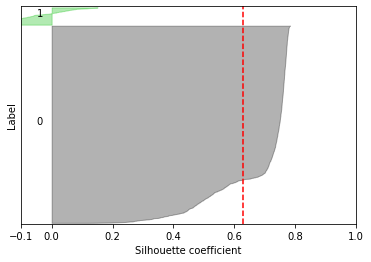

For n_clusters = 3 Average Silhouette Score: 0.6014138964237881


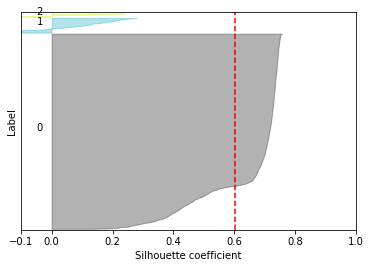

For n_clusters = 4 Average Silhouette Score: 0.4425791645541057


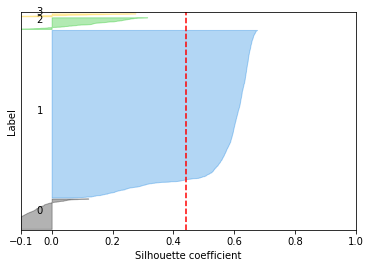

For n_clusters = 5 Average Silhouette Score: 0.46922393292155845


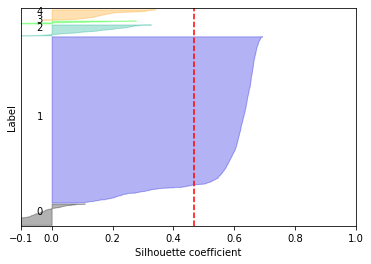

For n_clusters = 6 Average Silhouette Score: 0.47285803023784506


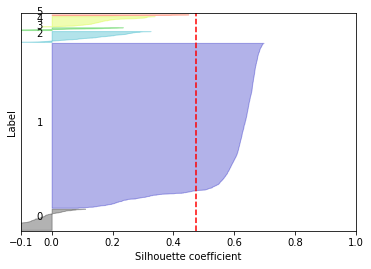

For n_clusters = 7 Average Silhouette Score: 0.4761920797243788


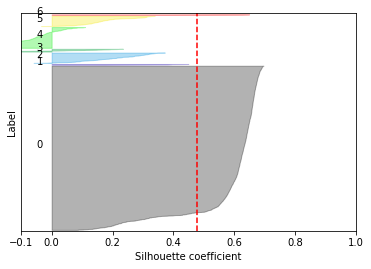

For n_clusters = 8 Average Silhouette Score: 0.48362949573240094


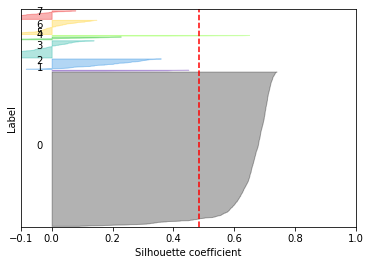

For n_clusters = 9 Average Silhouette Score: 0.13421633635027144


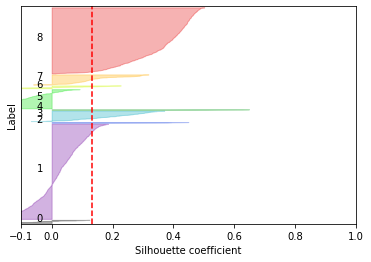

For n_clusters = 10 Average Silhouette Score: 0.49120130812140356


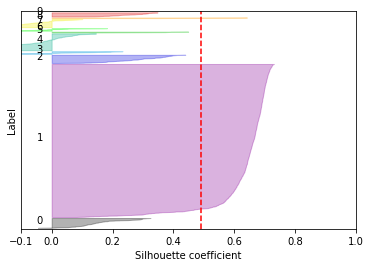

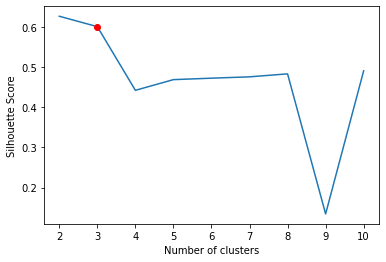

In [ ]:
r = range(2,11)
ds = dict()

for i in r:
    kmean = KMeans(n_clusters = i,random_state=0)
    result = kmean.fit_predict(scaled_features)
    a = silhouette_score(scaled_features,result)
    print("For n_clusters =", i,"Average Silhouette Score:", a) 
    ds[i] = a
    s = silhouette_samples(scaled_features,result)  #computation
    y1 = 10
    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])   #range
    ax.set_ylim([0, scaled_features.shape[0] + (i + 1) * 10])
    
    for j in range(i):
        sil_val = s[result== j]
        sil_val.sort()
        cluster_size = sil_val.shape[0]
        y2 = y1 + cluster_size
        c = cm.nipy_spectral(float(j) / i)
        ax.fill_betweenx(np.arange(y1, y2),0, sil_val, facecolor=c, edgecolor=c, alpha=0.3)
        ax.text(-0.05, y1 + 0.5 * cluster_size, str(j))
        y1 = y2 + 10 
        
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Label")
    ax.axvline(x=a, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    
d1 = pd.Series(ds)
ax = d1.plot()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,d1[3],'ro')

In [ ]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit_predict(scaled_features)
inertia = KM.inertia_
labels = KM.labels_
centroids= KM.cluster_centers_
print("The Labels are:",labels)
print("Centroids:",centroids)
print("The Shape of the centroid is: ",centroids.shape)
print("Inertia:",inertia)

The Labels are: [0 0 0 ... 0 0 0]
Centroids: [[-1.65895100e-01 -2.34682832e-01 -1.96334753e-01 -2.31111093e-01
   2.18409077e-01  2.13883134e-03 -2.08933494e-01  2.32034757e-02
   1.72277844e-01  1.71230778e-01 -2.06371743e-01 -2.58368325e-01
  -2.55282977e-01 -2.40428828e-01 -2.00464084e-01  5.87369984e-02
  -2.19575645e-01 -8.34669198e-03 -2.07113660e-02 -8.84199947e-02
  -2.43950674e-01 -2.15753663e-01 -2.37788815e-01  1.61677583e-02
   2.68810758e-02 -5.00911942e-03 -2.55293348e-01 -2.31597981e-01
  -2.03038044e-01 -2.07453539e-01 -2.28332557e-01 -2.35972456e-01
  -2.51057763e-01 -9.26896172e-03  3.98938381e-02 -9.14484288e-02
  -7.86730206e-02 -9.72999245e-02 -3.88075534e-02  1.79317426e-01
   7.73497975e-03  2.06804986e-03 -1.32783048e-01 -2.89257452e-02
   1.18074950e-04  2.29359875e-03 -2.49950697e-01 -2.35164510e-01
  -2.42060307e-01 -6.77909033e-02  3.96093619e-03 -6.55085569e-02
  -5.04880455e-02 -1.11763331e-01 -9.32130755e-02 -1.05022856e-01
   7.61654152e-02 -1.32447629e-

In [ ]:
#GMM
GMM = GaussianMixture(n_components = 3, random_state=0)
result = GMM.fit(scaled_features)
mean = GMM.means_
wt = GMM.weights_
labels2 = GMM.predict(scaled_features)
print("The Labels are:",labels)
print("Weights:",wt)
print("Means:",mean)

The Labels are: [0 0 0 ... 0 0 0]
Weights: [0.0432869  0.7734747  0.18323839]
Means: [[-0.39652114  0.06206572  0.07603914  0.26096639  0.04791077 -0.32822568
  -0.21706927 -1.826906    0.11102342  0.11163858  0.15790201 -0.08338672
  -0.04762327  0.13826984 -0.10126422 -0.36678233  0.07680974 -0.14087105
  -1.74502517  0.48057564  0.33579212  0.37185259  0.4101655  -0.54112177
  -0.11394088 -1.22584161  0.27136493  0.67891676  0.81071898  0.80297534
  -0.04170944  0.05084098  0.21380829 -1.75238265 -1.72415931  1.20122056
   1.66548585  1.6595849   0.95206669 -0.26427065  1.76239245  0.35398734
  -0.14718913  0.03511012 -0.04678862 -0.23622853  0.43840282  0.49687204
   0.46877114  1.00236298 -0.0498046  -0.09466443  0.47347417 -0.87119482
  -0.70094941 -0.82606667  0.83941592  0.85432095 -0.29704302 -0.05162556
  -1.12345036  1.04296264 -0.63146853 -0.70986837 -0.69673153 -0.63482148
  -0.60294364  0.45199546 -0.36372226  0.25809972 -1.39556559 -0.54406626
  -0.79856221 -0.90228979 -

In [ ]:
pca = PCA(random_state=0)
pca.fit(scaled_features)
arr = pca.transform(scaled_features)
pca1 = pd.DataFrame(arr)
var_ratio = pca.explained_variance_ratio_
val = pca.singular_values_
print("Head:",pca1.head())
print("Variance ratio:",var_ratio)
print("Singular Value:",val)

Head:          0          1          2         3         4         5         6   \
0 -4.010235  -5.349857   5.680015  3.276671  0.859208  4.629441  4.007919   
1 -3.934327  -5.109306   5.274482  4.126578  1.003348  4.985314  3.691244   
2 -4.007440  -5.377715   6.079796  3.556592  0.269820  3.821247  4.258222   
3 -4.053452  -5.724325   5.099042  3.824545  1.062155  4.741015  4.242035   
4  9.119734  12.057888  14.910355 -2.160295 -6.694607  1.107531  4.851599   

         7         8         9   ...        88        89        90        91  \
0 -1.077412  0.362089 -0.505874  ... -0.167645  0.027176  0.156152 -0.021671   
1 -0.913318  0.646702 -0.105260  ... -0.154753 -0.037776  0.054288 -0.046135   
2 -0.028228 -0.312168  0.008638  ...  0.008435 -0.010019  0.079239 -0.013334   
3 -0.834739  0.142631 -0.190375  ... -0.139926  0.007415  0.092067  0.041434   
4 -0.253631  1.782942 -1.619999  ... -0.266475  0.021020 -0.072533  0.400927   

         92        93        94        95        9

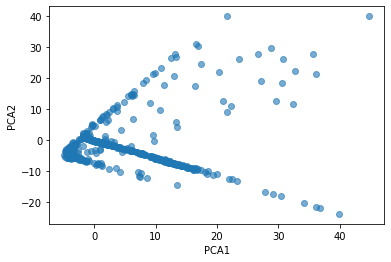

In [ ]:
pca = PCA(n_components=2, random_state=0)
pca.fit(scaled_features)
arr = pca.transform(scaled_features)
pca1 = pd.DataFrame(arr)
plt.scatter(x=pca1.iloc[:,0], y=pca1.iloc[:,1], alpha = 0.6)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
def kmeans_plot_pca(kmeans, X, n_clusters, rseed=2, ax=None):
    dot_size = 50
    cmap = 'plasma'
    labels = kmeans.fit_predict(X)
    fig, ax = plt.subplots(figsize=(9,7))    
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() 
             for i, center in enumerate(centers)]
    return          

Text(0, 0.5, 'PCA2')

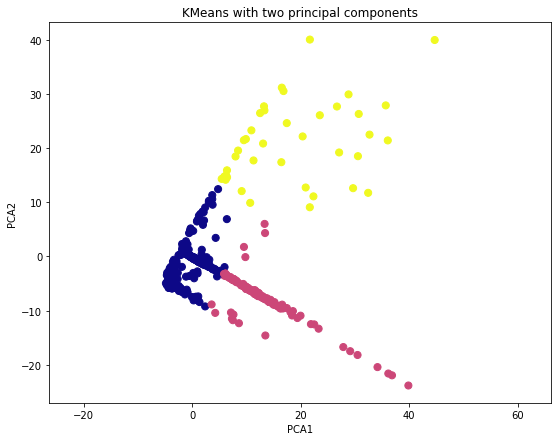

In [ ]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit(pca1)
label1 = KM.predict(pca1)
kmeans_plot_pca(KM, pca1.values,n_clusters=3)
plt.title('KMeans with two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Multi class classification using Multilayer Perceptron Model

####Features selected: Phone accelerometer and Watch accelerometer 

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc'])

In [ ]:
a = ['label:FIX_walking','label:LYING_DOWN','label:SITTING','label:OR_standing', 'label:SLEEPING']

In [ ]:
from sklearn.neural_network import MLPClassifier 
for label in a:
    print ("****************** "+label+" ********************")
    X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y[label], test_size=0.30, random_state=42)    
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train.values.ravel()) 
    pred = mlp.predict(X_test) 
    print(classification_report(y_test,pred))
    print("Accuracy:")
    print(metrics.accuracy_score(y_test, pred))

****************** label:FIX_walking ********************
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       641
        True       0.65      0.67      0.66        46

    accuracy                           0.95       687
   macro avg       0.81      0.82      0.82       687
weighted avg       0.95      0.95      0.95       687

Accuracy:
0.9534206695778749
****************** label:LYING_DOWN ********************
              precision    recall  f1-score   support

       False       0.95      0.94      0.95       475
        True       0.87      0.89      0.88       212

    accuracy                           0.93       687
   macro avg       0.91      0.92      0.91       687
weighted avg       0.93      0.93      0.93       687

Accuracy:
0.925764192139738
****************** label:SITTING ********************
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       368
        Tru

###Features selected: Phone accelerometer, Watch accelerometer, Gyroscope, location data

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc','Gyro','Loc'])

In [ ]:
a = ['label:FIX_walking','label:LYING_DOWN','label:SITTING','label:OR_standing', 'label:SLEEPING']

In [ ]:
from sklearn.neural_network import MLPClassifier 
for label in a:
    print ("****************** "+label+" ********************")
    X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y[label], test_size=0.30, random_state=42)    
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train.values.ravel()) 
    pred = mlp.predict(X_test) 
    print(classification_report(y_test,pred))
    print(metrics.accuracy_score(y_test, pred))

****************** label:FIX_walking ********************
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       641
        True       0.73      0.65      0.69        46

    accuracy                           0.96       687
   macro avg       0.85      0.82      0.83       687
weighted avg       0.96      0.96      0.96       687

0.9606986899563319
****************** label:LYING_DOWN ********************
              precision    recall  f1-score   support

       False       0.96      0.95      0.96       475
        True       0.89      0.92      0.90       212

    accuracy                           0.94       687
   macro avg       0.93      0.93      0.93       687
weighted avg       0.94      0.94      0.94       687

0.9403202328966521
****************** label:SITTING ********************
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       368
        True       0.87      0

###Features selected: Location and Audio features

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Loc','Aud'])

In [ ]:
a = ['label:FIX_walking','label:LYING_DOWN','label:SITTING','label:OR_standing', 'label:SLEEPING']

In [ ]:
from sklearn.neural_network import MLPClassifier 
for label in a:
    print ("****************** "+label+" ********************")
    X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y[label], test_size=0.30, random_state=42)    
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train.values.ravel()) 
    pred = mlp.predict(X_test) 
    print(classification_report(y_test,pred))
    print(metrics.accuracy_score(y_test, pred))

****************** label:FIX_walking ********************
              precision    recall  f1-score   support

       False       0.97      0.96      0.97       641
        True       0.52      0.57      0.54        46

    accuracy                           0.94       687
   macro avg       0.74      0.76      0.75       687
weighted avg       0.94      0.94      0.94       687

0.9359534206695779
****************** label:LYING_DOWN ********************
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       475
        True       0.93      0.94      0.94       212

    accuracy                           0.96       687
   macro avg       0.95      0.96      0.95       687
weighted avg       0.96      0.96      0.96       687

0.9606986899563319
****************** label:SITTING ********************
              precision    recall  f1-score   support

       False       0.91      0.88      0.89       368
        True       0.86      0

###Artificial Neural Network

###Features selected: Phone accelerometer and Watch accelerometer

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

In [ ]:
batch_size = 16

model = Sequential()
# Fully-connected layer
model.add(Dense(1, input_shape = (X_train.shape[1],), activation = "sigmoid"))
model.add(Dropout(0.2))
model.compile(loss = "binary_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy'])

# fit network
history=model.fit(X_train, y_train,
                      epochs = 10, 
                      batch_size = 16,
                      validation_data = (X_test, y_test))


Epoch 1/10
100/100 [==============================] - 3s 11ms/step - loss: 1.1125 - accuracy: 0.4863 - val_loss: 0.4885 - val_accuracy: 0.9025
Epoch 2/10
100/100 [==============================] - 1s 10ms/step - loss: 0.7176 - accuracy: 0.8819 - val_loss: 0.4035 - val_accuracy: 0.9214
Epoch 3/10
100/100 [==============================] - 1s 7ms/step - loss: 0.7297 - accuracy: 0.9137 - val_loss: 0.3522 - val_accuracy: 0.9316
Epoch 4/10
100/100 [==============================] - 1s 7ms/step - loss: 0.6463 - accuracy: 0.9269 - val_loss: 0.3232 - val_accuracy: 0.9345
Epoch 5/10
100/100 [==============================] - 1s 9ms/step - loss: 6.9201 - accuracy: 0.5194 - val_loss: 3.6794 - val_accuracy: 0.1295
Epoch 6/10
100/100 [==============================] - 1s 7ms/step - loss: 10.1263 - accuracy: 0.3056 - val_loss: 2.8201 - val_accuracy: 0.2183
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 6.0749 - accuracy: 0.4456 - val_loss: 1.6359 - val_accuracy: 0.5211
Epo

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9330422125181951

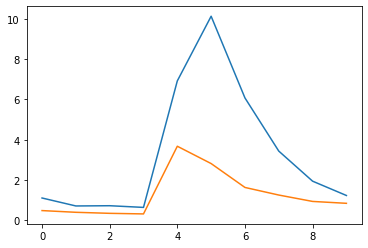

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###Features selected: Phone accelerometer, Watch accelerometer, Gyroscope, location sensor

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc','Gyro','Loc'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
batch_size = 16

model = Sequential()
# Fully-connected layer
model.add(Dense(1, input_shape = (X_train.shape[1],), activation = "sigmoid"))
model.add(Dropout(0.2))
model.compile(loss = "binary_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy'])

# fit network
history=model.fit(X_train, y_train,
                      epochs = 10, 
                      batch_size = 16,
                      validation_data = (X_test, y_test))


Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3076 - accuracy: 0.7212 - val_loss: 0.6448 - val_accuracy: 0.8937
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.9000 - val_loss: 0.6432 - val_accuracy: 0.9039
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 1.0323 - accuracy: 0.9119 - val_loss: 0.6587 - val_accuracy: 0.9054
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.9200 - val_loss: 0.6408 - val_accuracy: 0.9098
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.9090 - accuracy: 0.9169 - val_loss: 0.6403 - val_accuracy: 0.9112
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 0.8227 - accuracy: 0.9237 - val_loss: 0.6560 - val_accuracy: 0.9112
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.8967 - accuracy: 0.9125 - val_loss: 0.5598 - val_accuracy: 0.9287
Epoch 

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
accuracy_score(y_test,y_pred)

0.9330422125181951

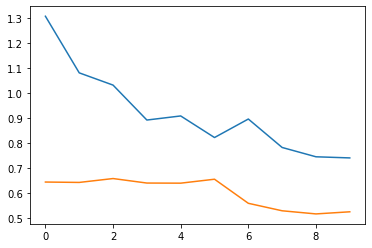

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###Features selected: Location and Audio features

In [ ]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Loc','Aud'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
batch_size = 16

model = Sequential()
# Fully-connected layer
model.add(Dense(1, input_shape = (X_train.shape[1],), activation = "sigmoid"))
model.add(Dropout(0.2))
model.compile(loss = "binary_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy'])

# fit network
history=model.fit(X_train, y_train,
                      epochs = 10, 
                      batch_size = 16,
                      validation_data = (X_test, y_test))


Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.9687 - accuracy: 0.5606 - val_loss: 0.5025 - val_accuracy: 0.8777
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.8256 - val_loss: 0.3994 - val_accuracy: 0.9258
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.9031 - val_loss: 0.3403 - val_accuracy: 0.9301
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.9269 - val_loss: 0.3032 - val_accuracy: 0.9330
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.9294 - val_loss: 0.2970 - val_accuracy: 0.9345
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.9269 - val_loss: 0.2707 - val_accuracy: 0.9345
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.9294 - val_loss: 0.2527 - val_accuracy: 0.9330
Epoch 

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
accuracy_score(y_test,y_pred)

0.9330422125181951

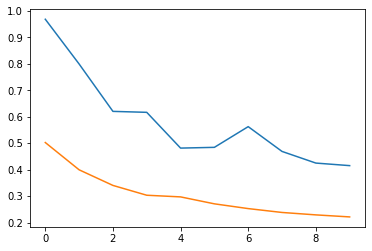

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###References:
#####http://extrasensory.ucsd.edu/intro2extrasensory/intro2extrasensory.html